4/10/23, 2:59 PM Spam filtering - Colaboratory

> Milestone 2:Data Collection & Preparation
>
> Importing the libraries
>
> import numpy as np  
> import pandas as pd  
> import matplotlib.pyplot as plt  
> import nltk  
> from nltk.corpus import stopwords  
> from nltk.stem.porter import PorterStemmer  
> from sklearn import datasets  
> from sklearn.model_selection import train_test_split from
> imblearn.over_sampling import SMOTE
>
> Read the Dataset

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="3"><blockquote>
<p>df = pd.read_csv("spam.csv",encoding="latin")</p>
</blockquote></th>
<th rowspan="3"><strong>Unnamed:</strong></th>
<th rowspan="3"><strong>Unnamed:</strong></th>
<th rowspan="2"><blockquote>
<p></p>
</blockquote></th>
</tr>
<tr class="odd">
<th colspan="3"><blockquote>
<p>df.head()</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2" rowspan="2"><strong>v1</strong></th>
<th rowspan="2"><strong>v2</strong></th>
<th><blockquote>
<p><strong>Unnamed:</strong></p>
</blockquote></th>
</tr>
<tr class="odd">
<th><strong>2</strong></th>
<th><strong>3</strong></th>
<th><strong>4</strong></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><strong>0</strong></td>
<td>ham</td>
<td>Go until jurong point, crazy.. Available only ...</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
<tr class="even">
<td><strong>1</strong></td>
<td>ham</td>
<td>Ok lar... Joking wif u oni...</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
<tr class="odd">
<td rowspan="2"><strong>2</strong></td>
<td rowspan="2">spam</td>
<td><blockquote>
<p>Free entry in 2 a wkly comp to win FA Cup</p>
</blockquote></td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
</tr>
<tr class="even">
<td>fina...</td>
</tr>
<tr class="odd">
<td rowspan="2"><strong>3</strong></td>
<td rowspan="2">ham</td>
<td><blockquote>
<p>U dun say so early hor... U c already then</p>
</blockquote></td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
</tr>
<tr class="even">
<td>say...</td>
</tr>
<tr class="odd">
<td><strong>4</strong></td>
<td>ham</td>
<td>Nah I don't think he goes to usf, he lives aro...</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
</tbody>
</table>

> <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image2.png"
> style="width:0.23611in;height:0.22222in" />
>
> Data preparation: 1.Handling missing values
>
> df.info() <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image3.png"
> style="width:0.14583in;height:0.30278in" />
>
> \<class 'pandas.core.frame.DataFrame'\>  
> RangeIndex: 5572 entries, 0 to 5571  
> Data columns (total 5 columns):  
> \# Column Non-Null Count Dtype  
> --- ------ -------------- -----  
> 0 v1 5572 non-null object  
> 1 v2 5572 non-null object  
> 2 Unnamed: 2 50 non-null object  
> 3 Unnamed: 3 12 non-null object

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
1/15

4/10/23, 2:59 PM Spam filtering - Colaboratory

> 4 Unnamed: 4 6 non-null object  
> dtypes: object(5)  
> memory usage: 217.8+ KB
>
> df.isna().sum()
>
> v1 0  
> v2 0  
> Unnamed: 2 5522  
> Unnamed: 3 5560  
> Unnamed: 4 5566  
> dtype: int64
>
> df.rename({"v1":"label","v2":"text"},inplace=True,axis=1)

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="3">df.tail()</th>
<th rowspan="3"><strong>label</strong></th>
<th rowspan="3"><strong>text</strong></th>
<th rowspan="2"><strong>Unnamed:</strong></th>
<th rowspan="2"><strong>Unnamed:</strong></th>
<th><blockquote>
<p></p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p><strong>Unnamed:</strong></p>
</blockquote></th>
</tr>
<tr class="header">
<th><strong>2</strong></th>
<th><strong>3</strong></th>
<th><strong>4</strong></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td rowspan="2"><strong>5567</strong></td>
<td rowspan="2">spam</td>
<td><blockquote>
<p>This is the 2nd time we have tried 2</p>
</blockquote></td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
</tr>
<tr class="even">
<td>contact u...</td>
</tr>
<tr class="odd">
<td><strong>5568</strong></td>
<td>ham</td>
<td><blockquote>
<p>Will Ì_ b going to esplanade fr home?</p>
</blockquote></td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
<tr class="even">
<td rowspan="2"><strong>5569</strong></td>
<td rowspan="2">ham</td>
<td>Pity, * was in mood for that. So...any other</td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
</tr>
<tr class="odd">
<td>s...</td>
</tr>
<tr class="even">
<td rowspan="2"><strong>5570</strong></td>
<td rowspan="2">ham</td>
<td>The guy did some bitching but I acted like</td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
<td rowspan="2">NaN</td>
</tr>
<tr class="odd">
<td>i'd...</td>
</tr>
<tr class="even">
<td><strong>5571</strong></td>
<td>ham</td>
<td>Rofl. Its true to its name</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
</tbody>
</table>

> <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image4.png"
> style="width:0.23611in;height:0.23611in" />
>
> 2.Handling Categorical Values
>
> from sklearn.preprocessing import LabelEncoder  
> le = LabelEncoder()  
> df\['label'\] = le.fit_transform(df\['label'\])
>
> digits = datasets.load_digits()  
> x = digits.data  
> y = digits.target
>
> 3.Handling Imbalance Data
>
> from sklearn.model_selection import train_test_split  
> x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =
> 0.20, random_state =

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
2/15

4/10/23, 2:59 PM Spam filtering - Colaboratory

> \### Given data is imbalanced one, we are balancing the data
>
> print("Before OverSampling, counts of label '1':{}".format(sum(y_train
> == 1))) print("Before OverSampling, counts of label '0': {}
> \n".format(sum(y_train == 0)))
>
> from imblearn.over_sampling import SMOTE  
> sm = SMOTE(random_state =2)  
> x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
>
> print('After OverSampling, the shape of train_x:
> {}'.format(x_train_res.shape)) print('After OverSampling, the shape of
> train_y:{} \n'.format(y_train_res.shape))
>
> print("After OverSampling, counts of label '1':
> {}".format(sum(y_train_res == 1))) print("After OverSampling, counts
> of label '0': {}".format(sum(y_train_res == 0)))
>
> Before OverSampling, counts of label '1':147  
> Before OverSampling, counts of label '0': 151
>
> After OverSampling, the shape of train_x: (1540, 64) After
> OverSampling, the shape of train_y:(1540,)
>
> After OverSampling, counts of label '1': 154  
> After OverSampling, counts of label '0': 154
>
> Cleaning the text data
>
> nltk.download("stopwords")
>
> \[nltk_data\] Downloading package stopwords to /root/nltk_data...
> \[nltk_data\] Package stopwords is already up-to-date!
>
> True
>
> True
>
> True
>
> import nltk  
> from nltk.corpus import stopwords  
> from nltk.stem import PorterStemmer
>
> import re  
> corpus = \[\]  
> length = len(df)
>
> for i in range(0,length):  
> text = re.sub("\[^a-zA-Z0-9\]"," ",df\["text"\]\[i\]) text =
> text.lower()  
> text = text.split()  
> pe = PorterStemmer()

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
3/15

4/10/23, 2:59 PM Spam filtering - Colaboratory

> stopword = stopwords.words("english")  
> text = \[pe.stem(word) for word in text if not word in set(stopword)\]
> text = " ".join(text)  
> corpus.append(text)
>
> corpus <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image3.png"
> style="width:0.14583in;height:0.30278in" />

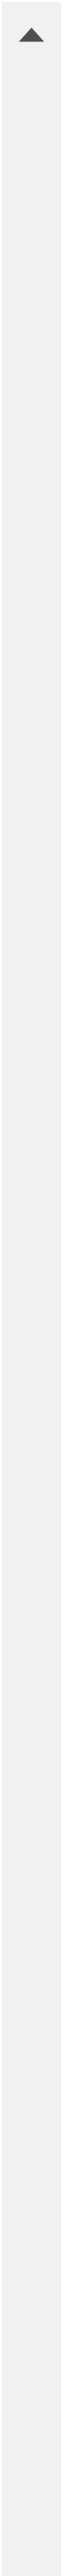

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
4/15

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>4/10/23, 2:59 PM</th>
<th>Spam filtering - Colaboratory</th>
<th rowspan="2">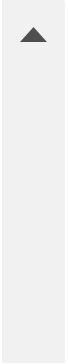</th>
</tr>
<tr class="odd">
<th colspan="2"><blockquote>
<p>number ,<br />
'chang e one next escal',<br />
'yetund class run water make ok pl',<br />
'lot happen feel quiet beth aunt charli work lot helen mo',<br />
'wait 4 bu stop aft ur lect lar dun c go get car come back n pick',
'aight thank comin',<br />
...]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> from sklearn.feature_extraction.text import CountVectorizer cv =
> CountVectorizer(max_features=35000)  
> X = cv.fit_transform(corpus).toarray()

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>import pickle<br />
pickle.dump(cv, open('cv1.pkl', 'wb'))</p>
</blockquote></th>
<th>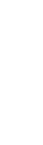</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Milestone 3: Exploratory Data Analysis
>
> Descriptive Statistical

<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="3"><blockquote>
<p>df.describe()</p>
</blockquote></th>
<th rowspan="2"><blockquote>
<p>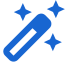</p>
</blockquote></th>
<th rowspan="2"></th>
</tr>
<tr class="odd">
<th colspan="3"><strong>label</strong></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td colspan="2"><strong>count</strong></td>
<td>5572.000000</td>
<td rowspan="8"></td>
<td rowspan="8"></td>
</tr>
<tr class="even">
<td><strong>mean</strong></td>
<td colspan="2">0.134063</td>
</tr>
<tr class="odd">
<td><strong>std</strong></td>
<td colspan="2">0.340751</td>
</tr>
<tr class="even">
<td><strong>min</strong></td>
<td colspan="2">0.000000</td>
</tr>
<tr class="odd">
<td><strong>25%</strong></td>
<td colspan="2">0.000000</td>
</tr>
<tr class="even">
<td><strong>50%</strong></td>
<td colspan="2">0.000000</td>
</tr>
<tr class="odd">
<td><strong>75%</strong></td>
<td colspan="2">0.000000</td>
</tr>
<tr class="even">
<td><strong>max</strong></td>
<td colspan="2">1.000000</td>
</tr>
</tbody>
</table>

> df.shape
>
> (5572, 5)
>
> Visual Analysis: 1.Univariate analysis

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>df["label"].value_counts().plot(kind="bar",figsize=(12,6))</p>
</blockquote></th>
<th rowspan="3">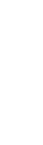</th>
<th rowspan="3">5/15</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>plt.xticks(np.arange(2), ('Non Spam','Spam'),rotation=0);</p>
</blockquote></th>
</tr>
<tr class="header">
<th>https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&amp;printMode=true</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

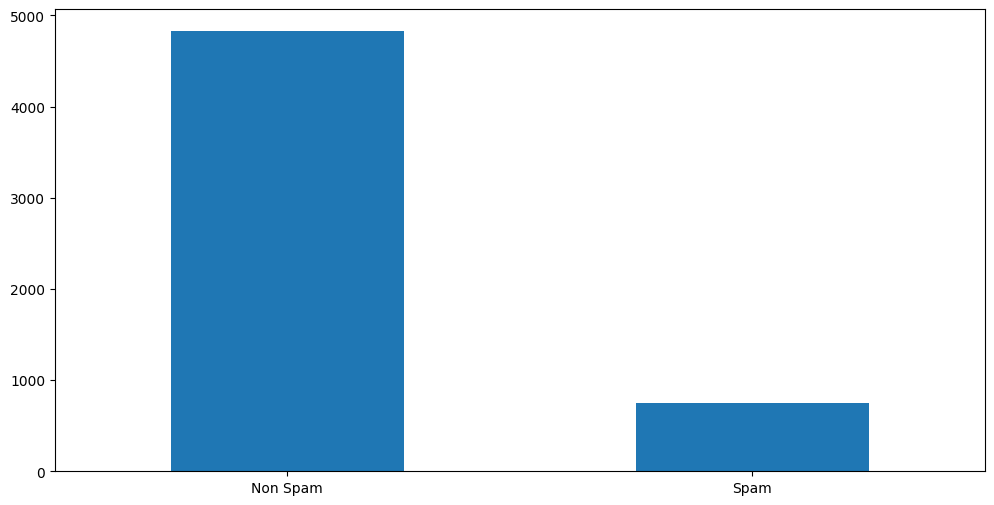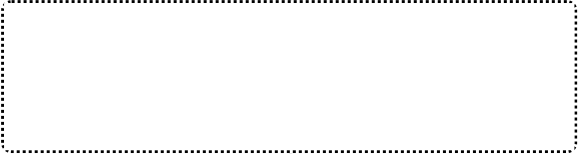

| 4/10/23, 2:59 PM | Spam filtering - Colaboratory |
|------------------|-------------------------------|

> Scaling the data
>
> from sklearn.preprocessing import StandardScaler x =
> StandardScaler().fit_transform(x)
>
> x_bal = digits.data  
> sc=StandardScaler()  
> x_bal=sc.fit_transform(x_bal)
>
> Splitting data into train and test
>
> from sklearn.model_selection import train_test_split  
> x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =
> 0.20, random_state =
>
> Milestone 4: Model Building
>
> Decision tree model
>
> from sklearn.tree import DecisionTreeClassifier  
> model = DecisionTreeClassifier()  
> model.fit(x_train_res, y_train_res)
>
> ▾ DecisionTreeClassifier
>
> DecisionTreeClassifier()
>
> Random forest model

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>from sklearn.ensemble import RandomForestClassifier</p>
</blockquote></th>
<th rowspan="4"></th>
<th rowspan="4">6/15</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>model1 =RandomForestClassifier()</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>model1.fit(x_train_res, y_train_res)</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&amp;printMode=true</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

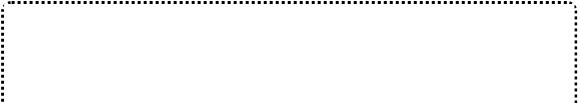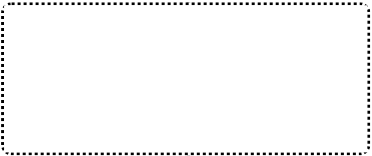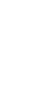

4/10/23, 2:59 PM Spam filtering - Colaboratory

> ▾ RandomForestClassifier
>
> RandomForestClassifier()
>
> Naive Bayes model
>
> from sklearn.naive_bayes import MultinomialNB
>
> model = MultinomialNB()
>
> model.fit(x_train_res, y_train_res) <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image12.png"
> style="width:0.14583in;height:0.30278in" />
>
> ▾ MultinomialNB
>
> MultinomialNB()
>
> ANN model
>
> from tensorflow.keras.models import Sequential
>
> from tensorflow.keras.layers import Dense
>
> model = Sequential()
>
> x_train.shape
>
> (1437, 64)
>
> model.add(Dense(units =
> x_train_res.shape\[1\],activation="relu",kernel_initializer="random\_
>
> model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))
>
> model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))
>
> model.add(Dense(units=1,activation="sigmoid"))
>
> model.compile(optimizer="adam",loss="binary_crossentropy",metrics=\['accuracy'\])
>
> generator
> =model.fit(x_train_res,y_train_res,epochs=10,steps_per_epoch=len(x_train\_
>
> Epoch 1/10
>
> 24/24 \[==============================\] - 1s 3ms/step - loss:
> -65.2602 - accuracy: 0.
>
> Epoch 2/10
>
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -1968.6589 - accuracy:
>
> Epoch 3/10
>
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -16956.0859 - accuracy:
>
> Epoch 4/10
>
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -78445.0156 - accuracy:
>
> Epoch 5/10
>
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -261719.6250 - accuracy

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
7/15



4/10/23, 2:59 PM Spam filtering - Colaboratory

> Epoch 6/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -680814.3750 - accuracy Epoch 7/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -1510385.0000 - accurac Epoch 8/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -2992491.0000 - accurac Epoch 9/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -5371300.0000 - accurac Epoch 10/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -9039938.0000 - accurac
>
> <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image15.png"
> style="width:6.79167in;height:0.13889in" />
>
> generator
> =model.fit(x_train_res,y_train_res,epochs=10,steps_per_epoch=len(x_train\_
>
> Epoch 1/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -14335302.0000 - accura Epoch 2/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -21755360.0000 - accura Epoch 3/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -31776266.0000 - accura Epoch 4/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -44803328.0000 - accura Epoch 5/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -61536672.0000 - accura Epoch 6/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -82709320.0000 - accura Epoch 7/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -108614544.0000 - accur Epoch 8/10  
> 24/24 \[==============================\] - 0s 2ms/step - loss:
> -140230864.0000 - accur Epoch 9/10  
> 24/24 \[==============================\] - 0s 3ms/step - loss:
> -177975296.0000 - accur Epoch 10/10  
> 24/24 \[==============================\] - 0s 4ms/step - loss:
> -223046240.0000 - accur
>
> <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image16.png"
> style="width:6.79167in;height:0.23611in" />
>
> Testing the model

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>y_pred=model.predict(x_test)<br />
y_pred</p>
</blockquote></th>
<th></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

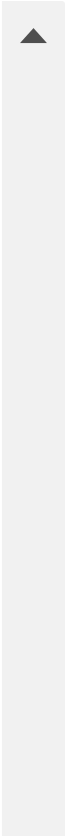

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
8/15

<table>
<colgroup>
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="43">4/10/23, 2:59 PM</th>
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
<th rowspan="43"><blockquote>
<p>Spam filtering - Colaboratory</p>
</blockquote></th>
<th rowspan="43">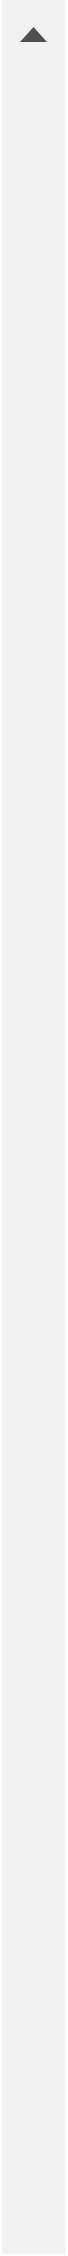</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.]], dtype=float32)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> y_pr = np.where(y_pred\>0.5,1,0)

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>y_test</p>
</blockquote></th>
<th></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> array(\[2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8,
> 7, 8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
> 1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9, 2,
> 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5, 1, 2,
> 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7, 3, 4, 8,
> 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9, 9, 5, 9, 9,
> 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3, 6, 1, 8, 9, 8,
> 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6, 3, 8, 6, 7, 4, 5,
> 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9, 6, 4, 5, 0, 1, 4, 6,
> 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9, 2, 4, 9, 3, 7, 6, 2, 3,
> 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
9/15



4/10/23, 2:59 PM Spam filtering - Colaboratory

> 9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5, 9,
> 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4, 5, 3,
> 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0, 1, 7, 2, 0, 9, 6, 0, 4, 2, 0,
> 7, 9, 8, 5, 4, 8, 2, 8, 4, 3, 7, 2, 6, 9, 1, 5, 1, 0, 8, 2, 1, 9, 5,
> 6, 8, 2, 7, 2, 1, 5, 1, 6, 4, 5, 0, 9, 4, 1, 1, 7, 0, 8, 9, 0, 5, 4,
> 3, 8, 8\])
>
> from sklearn.metrics import confusion_matrix,accuracy_score cm =
> confusion_matrix(y_test, y_pr)  
> score = accuracy_score(y_test,y_pr)  
> print(cm)  
> print('Accuracy Score Is:-' ,score\*100)
>
> \[\[ 0 27 0 0 0 0 0 0 0 0\]  
> \[ 0 35 0 0 0 0 0 0 0 0\]  
> \[ 0 36 0 0 0 0 0 0 0 0\]  
> \[ 0 29 0 0 0 0 0 0 0 0\]  
> \[ 0 30 0 0 0 0 0 0 0 0\]  
> \[ 0 40 0 0 0 0 0 0 0 0\]  
> \[ 0 44 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 41 0 0 0 0 0 0 0 0\]\]  
> Accuracy Score Is:- 9.722222222222223
>
> In ANN we �rst have to save the model to the test the inputs
>
> from keras.models import load_model  
> from keras import models
>
> from keras import models
>
> def new_review(new_review):  
> new_review = new_review  
> new_review = re.sub('\[^a-zA-Z\]', ' ',new_review)  
> new_review = new_review.lower()  
> new_review = new_review.split()  
> ps = PorterStemmer()  
> all_stopwords = stopwords.words('english')  
> all_stopwords.remove('not')  
> new_review = \[ps.stem(word) for word in new_review if not word in
> set(all_stopwo new_review = ' '.join(new_review)  
> new_corpus = \[new_review\]  
> new_x\_test = cv.transform(new_corpus).toarray()  
> print(new_x\_test)  
> new_y\_pred = load_model.predict(new_x\_test)  
> print(new_y\_pred)  
> new_x\_pred = np.where(new_y\_pred\>0.5,1,0)  
> return new_y\_pred
>
> <img
> src="attachment:vertopal_675ad27fbd484812b0cfebfda418e79b/media/image19.png"
> style="height:0.13889in" />new_review = new_review(str(input("Enter
> new review...")))

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th><blockquote>
<p>Enter new review...</p>
</blockquote>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
</tbody>
</table></th>
<th rowspan="2">10/15</th>
</tr>
<tr class="odd">
<th
colspan="2">https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&amp;printMode=true</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

4/10/23, 2:59 PM Spam filtering - Colaboratory

> Milestone 5: Performance Testing & Hyperparameter Tuning
>
> Compare the model
>
> from sklearn.metrics import confusion_matrix,accuracy_score,
> classification_report cm = confusion_matrix(y_test, y_pred)  
> score = accuracy_score(y_test,y_pred)  
> print(cm)  
> print('Accuracy Score Is Naive Bayes:-' ,score\*100)
>
> \[\[ 0 27 0 0 0 0 0 0 0 0\]  
> \[ 0 35 0 0 0 0 0 0 0 0\]  
> \[ 0 36 0 0 0 0 0 0 0 0\]  
> \[ 0 29 0 0 0 0 0 0 0 0\]  
> \[ 0 30 0 0 0 0 0 0 0 0\]  
> \[ 0 40 0 0 0 0 0 0 0 0\]  
> \[ 0 44 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 41 0 0 0 0 0 0 0 0\]\]  
> Accuracy Score Is Naive Bayes:- 9.722222222222223
>
> y_pred1 = np.where(y_pred\>0.5,1,0)  
> y_pred

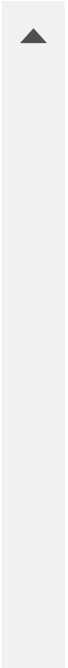

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
11/15

<table>
<colgroup>
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="46">4/10/23, 2:59 PM</th>
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
<th rowspan="46"><blockquote>
<p>Spam filtering - Colaboratory</p>
</blockquote></th>
<th rowspan="46">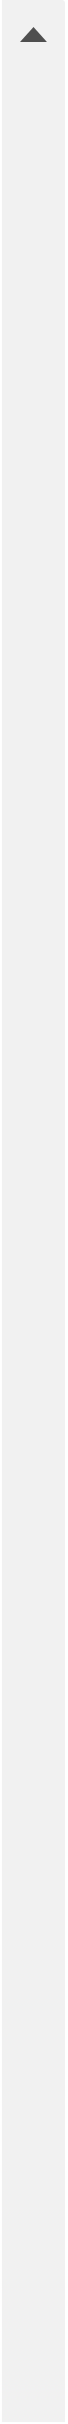</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>[1.],</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>[1.]], dtype=float32)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> cm = confusion_matrix(y_test, y_pred)  
> score = accuracy_score(y_test,y_pred)  
> print(cm)  
> print('Accuracy Score Is:-' ,score\*100)
>
> cm1 = confusion_matrix(y_test, y_pred1)  
> score1 = accuracy_score(y_test,y_pred1)  
> print(cm1)  
> print('Accuracy Score Is:-' ,score1\*100)
>
> \[\[ 0 27 0 0 0 0 0 0 0 0\]  
> \[ 0 35 0 0 0 0 0 0 0 0\]

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
12/15

4/10/23, 2:59 PM Spam filtering - Colaboratory

> \[ 0 36 0 0 0 0 0 0 0 0\]  
> \[ 0 29 0 0 0 0 0 0 0 0\]  
> \[ 0 30 0 0 0 0 0 0 0 0\]  
> \[ 0 40 0 0 0 0 0 0 0 0\]  
> \[ 0 44 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 41 0 0 0 0 0 0 0 0\]\]  
> Accuracy Score Is:- 9.722222222222223  
> \[\[ 0 27 0 0 0 0 0 0 0 0\]  
> \[ 0 35 0 0 0 0 0 0 0 0\]  
> \[ 0 36 0 0 0 0 0 0 0 0\]  
> \[ 0 29 0 0 0 0 0 0 0 0\]  
> \[ 0 30 0 0 0 0 0 0 0 0\]  
> \[ 0 40 0 0 0 0 0 0 0 0\]  
> \[ 0 44 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 41 0 0 0 0 0 0 0 0\]\]  
> Accuracy Score Is:- 9.722222222222223
>
> from sklearn.metrics import confusion_matrix,accuracy_score cm =
> confusion_matrix(y_test, y_pr)  
> score = accuracy_score(y_test,y_pr)  
> print(cm)  
> print('Accuracy Score Is:-' ,score\*100)
>
> \[\[ 0 27 0 0 0 0 0 0 0 0\]  
> \[ 0 35 0 0 0 0 0 0 0 0\]  
> \[ 0 36 0 0 0 0 0 0 0 0\]  
> \[ 0 29 0 0 0 0 0 0 0 0\]  
> \[ 0 30 0 0 0 0 0 0 0 0\]  
> \[ 0 40 0 0 0 0 0 0 0 0\]  
> \[ 0 44 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 41 0 0 0 0 0 0 0 0\]\]  
> Accuracy Score Is:- 9.722222222222223
>
> Comparing model accuracy before & after applying hyperparameter tuning
>
> from sklearn.metrics import confusion_matrix,accuracy_score cm =
> confusion_matrix(y_test, y_pr)  
> score = accuracy_score(y_test,y_pr)  
> print(cm)  
> print('Accuracy Score Is:-' ,score\*100)
>
> \[\[ 0 27 0 0 0 0 0 0 0 0\]  
> \[ 0 35 0 0 0 0 0 0 0 0\]  
> \[ 0 36 0 0 0 0 0 0 0 0\]  
> \[ 0 29 0 0 0 0 0 0 0 0\]  
> \[ 0 30 0 0 0 0 0 0 0 0\]  
> \[ 0 40 0 0 0 0 0 0 0 0\]  
> \[ 0 44 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]  
> \[ 0 39 0 0 0 0 0 0 0 0\]

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
13/15

4/10/23, 2:59 PM Spam filtering - Colaboratory

> \[ 0 41 0 0 0 0 0 0 0 0\]\]  
> Accuracy Score Is:- 9.722222222222223
>
> Milestone 6: Model Deployment
>
> Save the best model
>
> model.save('spam.h5')
>
> Integrate with Web Framework
>
> Build Python code
>
> from flask import Flask, render_template, request import pickle  
> import numpy as np  
> import re  
> import nltk  
> from nltk.corpus import stopwords  
> from nltk.stem import PorterStemmer  
> from tensorflow.keras.models import load_model
>
> load_model = load_model('spam.h5')  
> cv = pickle.load(open('cv1.pkl','rb'))  
> app = Flask(\_\_name\_\_)
>
> @app.route('/')  
> def home():  
> return render_template('home.html')
>
> @app.route('/Spam',methods=\['Post','GET'\])  
> def prediction():  
> return render_template('spam.html')
>
> @app.route('/predict',methods=\['POST',\])  
> def predict():  
> if request.method == 'POST':  
> message = request.form\['message'\]  
> data = message
>
> new_review= str(data)  
> print(new_review)  
> new_review = re.sub('\[^a-zA-Z\]', ' ', new_review) new_review =
> new_review.lower()  
> new_review = new_review.split()  
> ps = PorterStemmer()  
> all_stopwords = stopwords.words('english')  
> all_stopwords.remove('not')

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
14/15

4/10/23, 2:59 PM Spam filtering - Colaboratory

> new_review = \[ps.stem(word) for word in new_review if not word in
> set(all_stopwords)\] new_review = ' '.join(new_review)  
> new_corpus = \[new_review\]  
> new_x\_test = cv.transform(new_corpus).toarray()  
> print(new_x\_test)  
> new_y\_pred = load_model.predict(new_x\_test)  
> new_x\_pred = np.where(new_y\_pred\>0.5,1,0)  
> print(new_x\_pred)  
> if new_review\[0\]\[1\]==1:  
> return render_template('result.html', prediction="Spam")  
> else :  
> return render_template('result.html', prediction="Not a Spam")

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>if __name__=="main__":</p>
<p>port=int(os.environ.get('PORT',5000))</p>
<p>app.run(debug=False)</p>
</blockquote></th>
<th></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p></p>
</blockquote></th>
<th>Executing (2s) &lt;cell line:
20&gt;raw_input()_input_request()select()</th>
<th>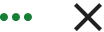</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

https://colab.research.google.com/drive/1c26rip8cEcenszTl53M-woVJWBA25udT#scrollTo=7LIu_LSqVvSQ&printMode=true
15/15
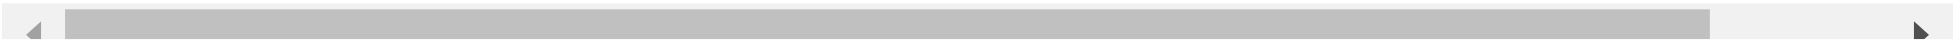
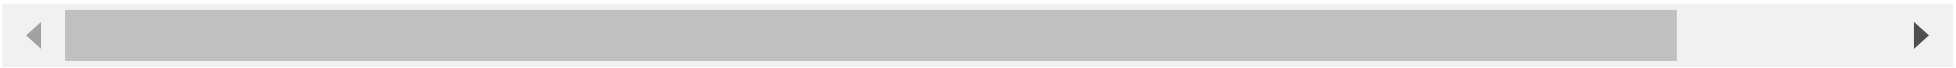
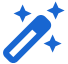
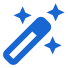